In [1]:
import datetime
import glob
import json
import os
import time

import cv2

import deodr
from deodr import ColoredTriMesh

from imageio import imsave

import matplotlib.pyplot as plt

import numpy as np
from deodr.pytorch import MeshDepthFitter

(1048, 3) (526, 3)
Energy=1928.645653 : EData=1928.645653 E_rigid=-0.000000


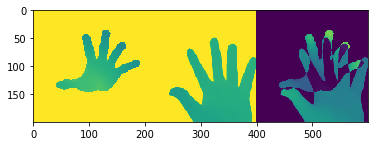

In [7]:
dl_library="none"
plot_curves=False
save_images=True
display=False
n_subdivision=0
depth_image = np.fliplr(
    np.fromfile(os.path.join(deodr.data_path, "depth.bin"), dtype=np.float32)
    .reshape(240, 320)
    .astype(np.float)
)
depth_image = depth_image[20:-20, 60:-60]
max_depth = 450
depth_image[depth_image == 0] = max_depth
depth_image = depth_image / max_depth

obj_file = os.path.join(deodr.data_path, "hand.obj")
faces, vertices = deodr.read_obj(obj_file)
print(faces.shape, vertices.shape)
mesh = ColoredTriMesh(faces.copy(), vertices=vertices, nb_colors=0).subdivise(
    n_subdivision
)

euler_init = np.array([0.1, 0.1, 0.1])
translation_init = np.zeros(3)

hand_fitter = MeshDepthFitter(
    mesh.vertices, mesh.faces, euler_init, translation_init, cregu=1000
)

hand_fitter.set_image(depth_image, focal=241, distortion=[1, 0, 0, 0, 0])
hand_fitter.set_max_depth(1)
hand_fitter.set_depth_scale(110 / max_depth)
energies = []
durations = []
start = time.time()


energy, synthetic_depth, diff_image = hand_fitter.step()
energies.append(energy)
durations.append(time.time() - start)
combined_image = np.column_stack(
    (depth_image, synthetic_depth, 3 * diff_image)
)
plt.imshow(combined_image)


(200, 200)

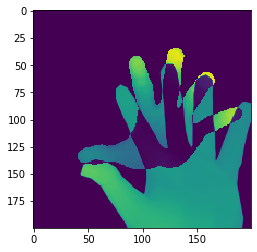

In [15]:
plt.imshow(diff_image)